In [5]:
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 17.2 MB/s eta 0:00:00


In [6]:
import numpy as np
import dowhy.datasets

# Generate synthetic data for highly correlated but not causally-related data
data_correlated = dowhy.datasets.linear_dataset(
    beta=10, num_common_causes=3, num_samples=10000, treatment_is_binary=True, num_instruments=0
)

# Generate synthetic data for causally related data
num_instruments = 2
data_causal = dowhy.datasets.linear_dataset(
    beta=10, num_common_causes=3, num_samples=10000, treatment_is_binary=True, num_instruments=num_instruments
)

In [ ]:
# import matplotlib.pyplot as plt
# plt.subplot(1,2,1)
# plt.imshow(np.corrcoef(data_correlated['df'].values.T))
# plt.subplot(1,2,2)
# plt.imshow(np.corrcoef(data_causal['df'].values.T))

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_cor_caus(data_correlated, data_causal):
  plt.figure(figsize=(10, 6))
  plt.subplot(1, 2, 1)
  # plt.imshow(np.corrcoef(data_correlated['df'].astype(float).values.T))
  data = np.corrcoef(data_correlated['df'].astype(float).values.T)
  sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
              xticklabels=data_correlated['df'].columns,
              yticklabels=data_correlated['df'].columns)
  plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
  # plt.colorbar()
  plt.title('Correlation matrix for correlated data')
  # plt.xticks(np.arange(len(data_correlated['df'].columns)), data_correlated['df'].columns, rotation=45)
  # plt.yticks(np.arange(len(data_correlated['df'].columns)), data_correlated['df'].columns)

  plt.subplot(1, 2, 2)
  # plt.imshow(np.corrcoef(data_correlated['df'].astype(float).values.T))
  data = np.corrcoef(data_causal['df'].astype(float).values.T)
  sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
              xticklabels=data_causal['df'].columns,
              yticklabels=data_causal['df'].columns)
  plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
  # plt.colorbar()
  plt.title('Correlation matrix for causal data')
  # plt.xticks(np.arange(len(data_causal['df'].columns)), data_causal['df'].columns, rotation=45)
  # plt.yticks(np.arange(len(data_causal['df'].columns)), data_causal['df'].columns)

  plt.show()

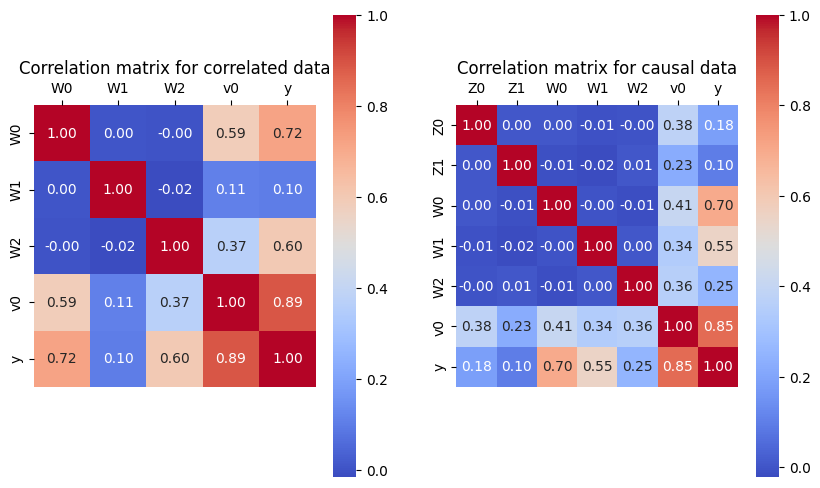

In [28]:
plot_cor_caus(data_correlated, data_causal)

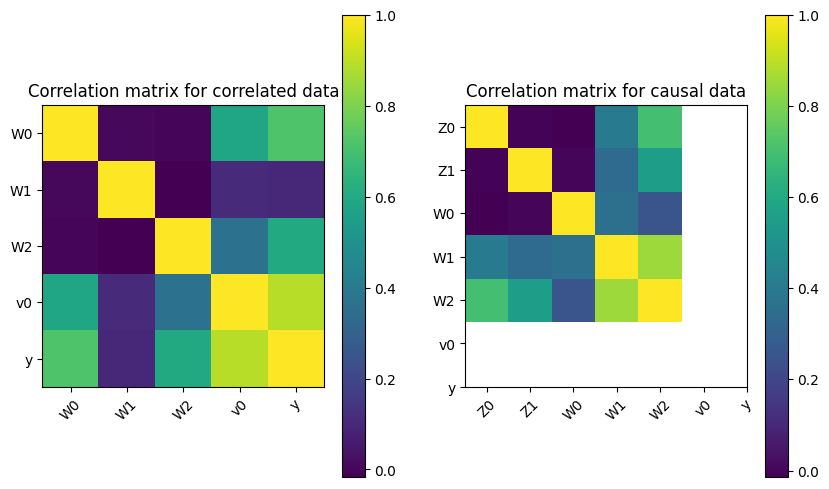

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.corrcoef(data_correlated['df'].astype(float).values.T))
plt.colorbar()
plt.title('Correlation matrix for correlated data')
plt.xticks(np.arange(len(data_correlated['df'].columns)), data_correlated['df'].columns, rotation=45)
plt.yticks(np.arange(len(data_correlated['df'].columns)), data_correlated['df'].columns)

plt.subplot(1, 2, 2)
plt.imshow(np.corrcoef(data_causal['df'].astype(float).values[:,num_instruments:].T))
plt.colorbar()
plt.title('Correlation matrix for causal data')
plt.xticks(np.arange(len(data_causal['df'].columns)),
           data_causal['df'].columns, rotation=45)
plt.yticks(np.arange(len(data_causal['df'].columns)),
           data_causal['df'].columns)

plt.show()